In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Fully_Encoded.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,10919.0,26.0,2006.0,10.0,361.0,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,77.000000,322.000000,1008.000000,1.000000
1,9265.0,11.0,1985.0,4.0,361.0,29.08,3.58,6.81,0.77,40.24,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
2,5534.0,26.0,2008.0,6.0,361.0,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,80.000000,709.000000,1008.000000,1.000000
3,10921.0,26.0,2009.0,10.0,361.0,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,77.000000,192.000000,1008.000000,1.000000
4,7294.0,5.0,1996.0,7.0,361.0,11.27,8.89,10.22,1.00,31.37,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16416 entries, 0 to 16415
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16416 non-null  float64
 1   Platform         16416 non-null  float64
 2   Year_of_Release  16416 non-null  float64
 3   Genre            16416 non-null  float64
 4   Publisher        16416 non-null  float64
 5   NA_Sales         16416 non-null  float64
 6   EU_Sales         16416 non-null  float64
 7   JP_Sales         16416 non-null  float64
 8   Other_Sales      16416 non-null  float64
 9   Global_Sales     16416 non-null  float64
 10  Critic_Score     16416 non-null  float64
 11  Critic_Count     16416 non-null  float64
 12  User_Score       16416 non-null  float64
 13  User_Count       16416 non-null  float64
 14  Developer        16416 non-null  float64
 15  Rating           16416 non-null  float64
dtypes: float64(16)
memory usage: 2.0 MB


In [4]:
X = df.iloc[:,[1,2,3,4,9,10,11,12,13,14,15]]
y = df.iloc[:,[5,6,7,8]]
X.head()

,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,26.0,2006.0,10.0,361.0,82.53,76.000000,51.000000,77.000000,322.000000,1008.000000,1.000000
1,11.0,1985.0,4.0,361.0,40.24,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
2,26.0,2008.0,6.0,361.0,35.52,82.000000,73.000000,80.000000,709.000000,1008.000000,1.000000
3,26.0,2009.0,10.0,361.0,32.77,80.000000,73.000000,77.000000,192.000000,1008.000000,1.000000
4,5.0,1996.0,7.0,361.0,31.37,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616


In [5]:
y.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,41.36,28.96,3.77,8.45
1,29.08,3.58,6.81,0.77
2,15.68,12.76,3.79,3.29
3,15.61,10.93,3.28,2.95
4,11.27,8.89,10.22,1.00


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("Coefficients: \n", lr.coef_)
print("Mean squared error of NA Sales: %.2f" % mean_squared_error(y_test['NA_Sales'], y_pred[:,0]))
print("Mean squared error of EU Sales: %.2f" % mean_squared_error(y_test['EU_Sales'], y_pred[:,1]))
print("Mean squared error of JP Sales: %.2f" % mean_squared_error(y_test['JP_Sales'], y_pred[:,2]))
print("Mean squared error of Ohter Sales: %.2f" % mean_squared_error(y_test['Other_Sales'], y_pred[:,3]))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [[ 2.14642533e-03 -3.19347207e-03 -1.87202500e-03 -6.04996546e-05
   5.00740714e-01 -2.64228863e-04 -1.65034722e-04  4.18853996e-04
  -3.13325898e-05  7.94947056e-06 -2.96687572e-03]
 [ 6.39994571e-04  5.64913065e-03  6.05004815e-04 -2.03555762e-05
   2.88154453e-01  5.59885836e-04 -3.56153265e-04 -6.57069105e-04
   7.73626481e-05  4.54154724e-06 -1.24480564e-03]
 [-3.16074121e-03 -5.17946302e-03  1.12094623e-03  8.54479799e-05
   1.22107393e-01 -6.75956090e-04  2.84035124e-04  3.64525768e-04
  -7.06170418e-05 -1.78614885e-05  4.31253569e-03]
 [ 3.75642034e-04  2.72653641e-03  1.49547077e-04 -4.12662529e-06
   8.90749986e-02  3.82311567e-04  2.47027449e-04 -1.30424926e-04
   2.45415416e-05  5.40120733e-06 -1.21873959e-04]]
Mean squared error of NA Sales: 0.06
Mean squared error of EU Sales: 0.04
Mean squared error of JP Sales: 0.06
Mean squared error of Ohter Sales: 0.01
Coefficient of determination: 0.73


## How should I visualize multiple regression? (with more than 2 input attributes)

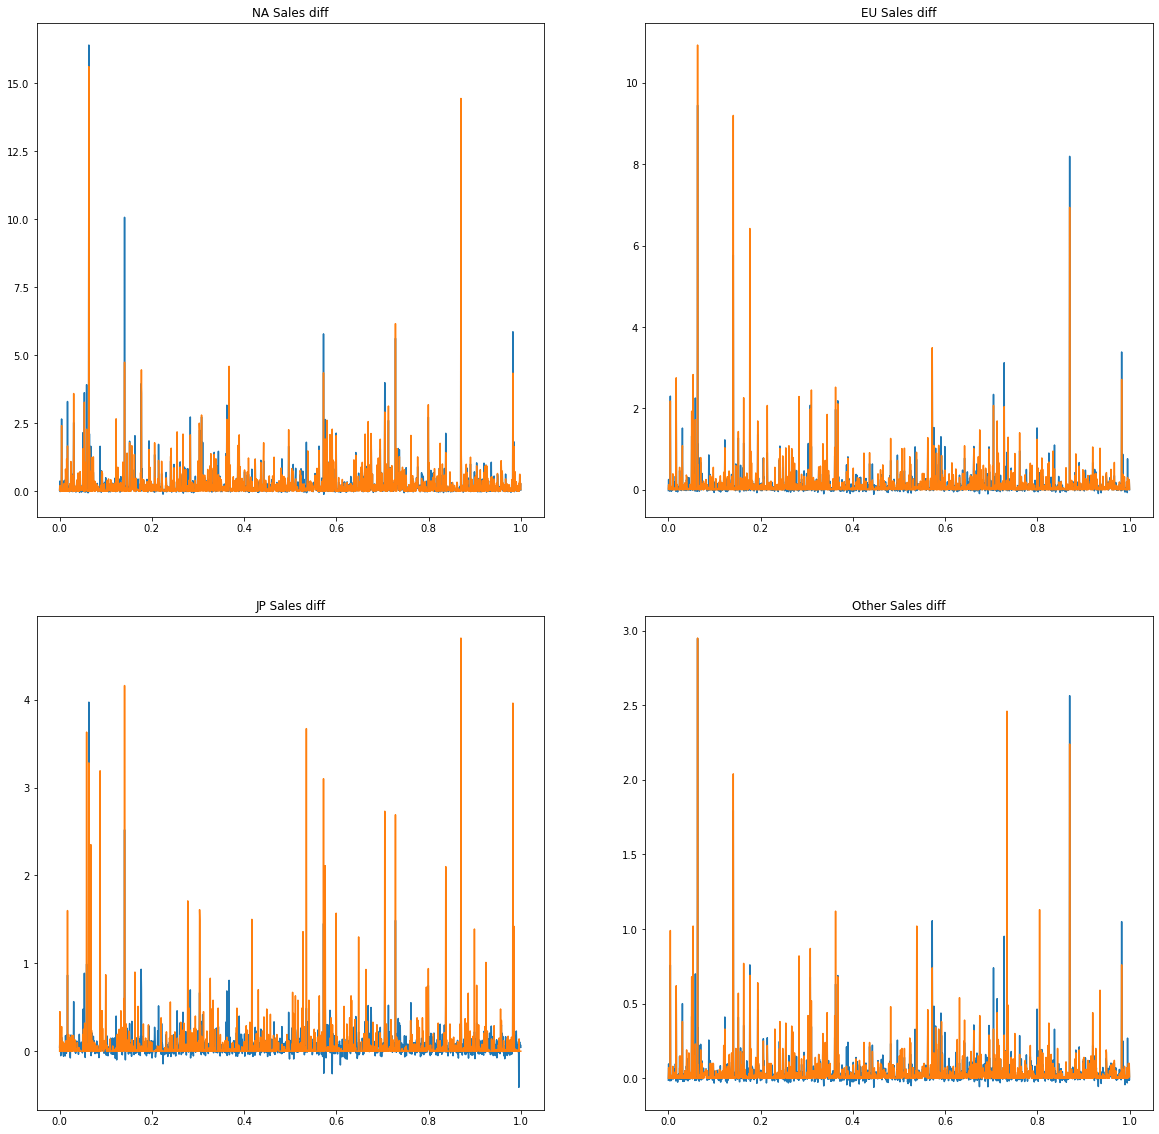

In [11]:
fig, axs = plt.subplots(2, 2)
fig.set_figheight(20)
fig.set_figwidth(20)
x1 = np.linspace(0, 1, 1642)
x2 = np.linspace(0, 1, 1642)
axs[0, 0].plot(x1, y_pred[:,0])
axs[0, 0].plot(x2, y_test['NA_Sales'])
axs[0, 0].set_title('NA Sales diff')
axs[0, 1].plot(x1, y_pred[:,1])
axs[0, 1].plot(x2, y_test['EU_Sales'])
axs[0, 1].set_title('EU Sales diff')
axs[1, 0].plot(x1, y_pred[:,2])
axs[1, 0].plot(x2, y_test['JP_Sales'])
axs[1, 0].set_title('JP Sales diff')
axs[1, 1].plot(x1, y_pred[:,3])
axs[1, 1].plot(x2, y_test['Other_Sales'])
axs[1, 1].set_title('Other Sales diff')
plt.show()